### On-line measuring of one qubit with MMW method
(toy example with no noise)

In [ ]:
using LinearAlgebra
using Statistics
using Plots

Function to generate an random $n \times n$ desity matrix we want to indentify (consider unknown)

In our toy example consider $2 \times 2$ desity matrix:
\begin{align}
  \rho = 
        \left(
        \begin{array}{ccccc}
            \rho_{00}   &   \rho_{01}  \\
            \rho_{01}^*  &  \rho_{11} \\
        \end{array}
        \right)
\end{align}

In [60]:
function ρᵣₐₙ(n)
    # return a random density matrix
    ρ = -1 .+ 2 * rand(n, n) 
    ρ += im * (-1 .+ 2 * rand(n, n))  
    ρ = ρ * ρ'
    Hermitian(ρ / tr(ρ))
end

ρᵣₐₙ (generic function with 1 method)

In [ ]:
ρ = ρᵣₐₙ(2)

We can use fidelity to check the similarity of quantum states
$F = \left( \operatorname{Tr} \sqrt{\sqrt{\rho} \omega \sqrt{\rho}} \right)^2$

In [2]:
function fidelity(ρ, 𝜔)
    s = sqrt(sqrt(ρ)*𝜔*sqrt(ρ))
    return abs(tr(s)^2)
end 

fidelity (generic function with 1 method)

In [64]:
ρ₁ = ρᵣₐₙ(2)
ρ₂ = [1/2 0; 0 1/2]
println(fidelity(ρ₁, ρ₂))
println(fidelity(ρ₁, ρ₁))

0.7990044763779182
1.0000000000000009


To perform measurements we need a set of POVM measurement operators $\{E_i\}$ 
such that $\sum_i E_i = I$.

To meausure in computational basis: $\{ |0\rangle, |1\rangle \}$ we need
\begin{align}
  E_0 = |0\rangle \langle 0|=
          \left(
        \begin{array}{ccccc}
            0  \\
            1  \\
        \end{array}
        \right) 
          \left(
        \begin{array}{ccccc}
            0   &   1  \\
        \end{array}
        \right) = 
        \left(
        \begin{array}{ccccc}
            0   &  0 \\
            0   &  1 \\
        \end{array}
        \right),
\quad
  E_1 = |1\rangle \langle 1|=
          \left(
        \begin{array}{ccccc}
            1  \\
            0  \\
        \end{array}
        \right) 
          \left(
        \begin{array}{ccccc}
            1   &   0 \\
        \end{array}
        \right) = 
        \left(
        \begin{array}{ccccc}
            1   &  0 \\
            0   &  0 \\
        \end{array}
        \right)
\end{align}

In [4]:
E₁ = [1 0; 0 0]
E₂ = [0 0; 0 1]

2×2 Matrix{Int64}:
 0  0
 0  1

To measure in $\{X\}$ basis $\{|+ \rangle = \frac{|0\rangle + |1\rangle }{\sqrt{2}}, 
  |- \rangle = \frac{|0\rangle - |1\rangle }{\sqrt{2}} \}$ we need:

 \begin{align}
  E_+ = |+\rangle \langle +|=
          \left(
        \begin{array}{ccccc}
            1/\sqrt{2}  \\
            1/\sqrt{2}  \\
        \end{array}
        \right) 
          \left(
        \begin{array}{ccccc}
            1/\sqrt{2}   &   1/\sqrt{2} \\
        \end{array}
        \right) = 
        \left(
        \begin{array}{ccccc}
            1/2   &  1/2 \\
            1/2   &  1/2 \\
        \end{array}
        \right), \quad
        E_{-} = |-\rangle \langle -|= 
        \left(
        \begin{array}{ccccc}
            1/2   &  -1/2 \\
            -1/2   &  1/2 \\
        \end{array}
        \right)    
\end{align}

In [5]:
Ex₊  = [1/2 1/2; 1/2 1/2]
Ex₋ = [1/2 -1/2; -1/2 1/2]

2×2 Matrix{Float64}:
  0.5  -0.5
 -0.5   0.5

To measure in $\{Y\}$ basis $\{|y+ \rangle = \frac{|0\rangle + i|1\rangle }{\sqrt{2}}, 
  |y- \rangle = \frac{|0\rangle - i|1\rangle }{\sqrt{2}} \}$ we need:
  
 \begin{align}
  E_y+ = |y+\rangle \langle y+|=
          \left(
        \begin{array}{ccccc}
            i/\sqrt{2}  \\
            1/\sqrt{2}  \\
        \end{array}
        \right) 
          \left(
        \begin{array}{ccccc}
            -i/\sqrt{2}   &   1/\sqrt{2} \\
        \end{array}
        \right) = 
        \left(
        \begin{array}{ccccc}
            1/2   &  i/2 \\
            -i/2   &  1/2 \\
        \end{array}
        \right), \quad
        E_{y-} = |y-\rangle \langle y-|= 
        \left(
        \begin{array}{ccccc}
            1/2   &  -i/2 \\
            i/2   &  1/2 \\
        \end{array}
        \right)    
\end{align}

In [6]:
Ey₊ = [1/2 im/2; -im/2 1/2]
Ey₋ = [1/2 -im/2; im/2 1/2]

2×2 Matrix{ComplexF64}:
 0.5+0.0im  0.0-0.5im
 0.0+0.5im  0.5+0.0im

Any density matrix could be expressed as linear combintion of Pauli matrices:

$ \rho = \frac{\operatorname{Tr}(\rho)I + \operatorname{Tr}(X\rho)X +
\operatorname{Tr}(Y\rho)Y +\operatorname{Tr}(Z\rho)Z}{2}$

To perform tomography we can also use Pauli matrices
\begin{align}
  I =  \begin{pmatrix}
            1   &  0 \\
            0   &  1 \\
       \end{pmatrix}
       \quad
  X =  \begin{pmatrix}
            0   &  1 \\
            1   &  0 \\
       \end{pmatrix}
       \quad
  Y =  \begin{pmatrix}
            0   &  -i \\
            i   &  0 \\
       \end{pmatrix}
       \quad 
  Z =  \begin{pmatrix}
            1   &   0 \\
            0   &  -1 \\
       \end{pmatrix}
       \quad   
\end{align}

In [7]:
I = [1 0; 0 1]
X = [0 1; 1 0]
Y = [0 -im; im 0]
Z = [1 0; 0 -1]
σ = [X, Y, Z]

3-element Vector{Matrix{Complex{Int64}}}:
 [0 + 0im 1 + 0im; 1 + 0im 0 + 0im]
 [0 + 0im 0 - 1im; 0 + 1im 0 + 0im]
 [1 + 0im 0 + 0im; 0 + 0im -1 + 0im]

We denote the eigen values of these operators $\lambda$

In [8]:
λₓ = eigvals(X)

2-element Vector{Float64}:
 -1.0
  1.0

Probability to obtain "1" when measure the observable $E_m$ is 

$p(m) = \operatorname{Tr}(E_m \rho)$

In [9]:
p₁ = abs(tr(E₁*ρ))
p₊ = abs(tr(Ex₊*ρ))
py = abs(tr(Ey₊*ρ))

0.8166171923706105

We can generate sequence that simulate measurements $Y$ with outcomes $\{0,1\}$ of the particular observable:

In [66]:
using Random, Distributions
p₁ = abs(tr(E₁*ρ))
d = Bernoulli(p₁)
𝑌 = rand(d, 100)
print(𝑌')
mean(𝑌)

Bool[1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1]

0.65

We can predict $\omega_{t}$ using the gradient:
$ \nabla_t (\omega_t) := 2\left({\operatorname{Tr}(E_t \omega_t) - Y_t} \right) E_t$ 

In [11]:
function ∇ₜ(𝜔ₜ, 𝐸ₜ, 𝑌ₜ)
    return 2*(tr(𝐸ₜ*𝜔ₜ)-𝑌ₜ)*𝐸ₜ
end

∇ₜ (generic function with 1 method)

In [12]:
𝜔₁ = [1/2 0; 0 1/2]
∇ₜ(𝜔₁, E₁, 1)
∇ₜ(𝜔₁, E₁, 0)

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  0.0

#### Matrix Multiplicative Weights (MMW) algorithm [Tsuda et al., 2005]
as described in Online Learning of Quantum States by Elad Hazan and others

1. Set $\omega_1 := 2^{-n} I$
for one qubit it is just 

\begin{align}
    \omega_1 := \begin{pmatrix}
        1/2 & 0 \\
        0 & 1/2 \\
    \end{pmatrix}
\end{align}

2. Update $\omega_{t+1}$:

$ \omega_{t+1} := \frac{\operatorname{exp}(-\frac{\eta}{L}\sum_{\tau=1}^t \nabla_t)}{\operatorname{Tr}(\operatorname{exp}(-\frac{\eta}{L}\sum_{\tau=1}^t \nabla_t))}
$

In [13]:
function next_𝜔(𝜔, 𝐸, 𝑌)
    ∇ = [∇ₜ(𝜔[i], 𝐸[i], 𝑌[i]) for i in 1:length(𝜔)]
    e = exp(- sum(∇))
    return e/tr(e)
end

next_𝜔 (generic function with 1 method)

In [47]:
ρ = ρᵣₐₙ(2)
#ρ = [1/2 0 ; 0 1/2]
#ρ = [1 0 ; 0 0]

2×2 Hermitian{ComplexF64, Matrix{ComplexF64}}:
   0.674606+0.0im       -0.0749177-0.377113im
 -0.0749177+0.377113im    0.325394+0.0im

Final fidelity:0.9413430920053973

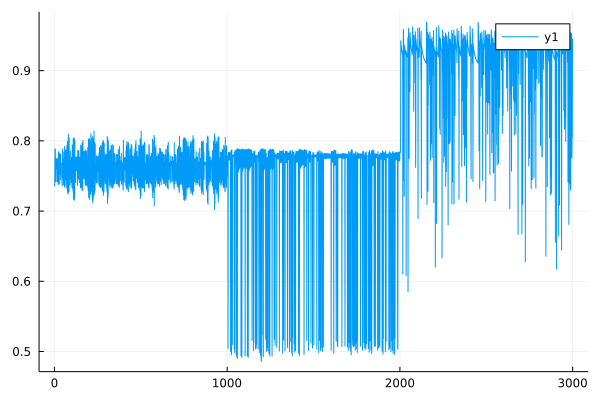

In [92]:
F = []
𝜔₁ = [1/2 0; 0 1/2]
𝜔 = []
𝑌 =[]
𝐸 = []

push!(𝜔, 𝜔₁)

n = 100

for 𝐸ₜ in [Z, X, Y] # Z, X, Y [E₁, E₂, Ex₊, Ex₋, Ey₊, Ey₋] E₁, Ex₊, Ey₊

    𝑌 = [𝑌 ; rand(Bernoulli(abs(tr(𝐸ₜ*ρ))), n)]
    𝐸 = [𝐸 ; repeat([𝐸ₜ], n)]

    #println("Measure operator", 𝐸ₜ )

    for t in 1:n
        𝜔ₜ = next_𝜔(𝜔, 𝐸, 𝑌)
        push!(𝜔, 𝜔ₜ)
        push!(F, fidelity(ρ, 𝜔ₜ))
    end  
    #println(𝜔[end])
end

print("Final fidelity:", fidelity(ρ, 𝜔[end]))

plot(F)

In [90]:
𝜔[end]

2×2 Matrix{ComplexF64}:
   0.471005+0.0im       -0.0276732-0.316303im
 -0.0276732+0.316303im    0.528995+0.0im

In [91]:
ρ 

2×2 Hermitian{ComplexF64, Matrix{ComplexF64}}:
   0.674606+0.0im       -0.0749177-0.377113im
 -0.0749177+0.377113im    0.325394+0.0im

Try with other set of operators

Final fidelity:0.9369368684213193

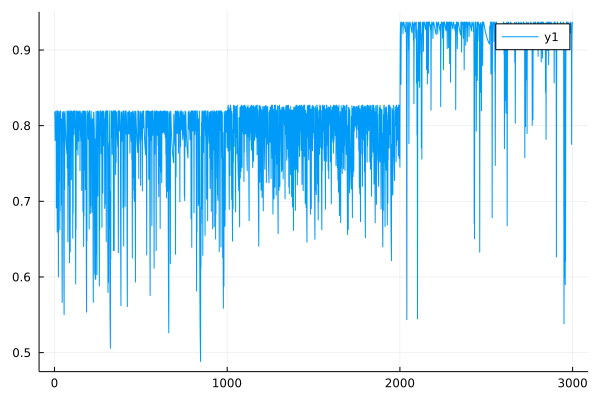

In [94]:
F = []
𝜔₁ = [1/2 0; 0 1/2]
𝜔 = []
𝑌 =[]
𝐸 = []

push!(𝜔, 𝜔₁)

n = 1000

for 𝐸ₜ in [E₁, Ex₊, Ey₊]

    𝑌 = [𝑌 ; rand(Bernoulli(abs(tr(𝐸ₜ*ρ))), n)]
    𝐸 = [𝐸 ; repeat([𝐸ₜ], n)]

    #println("Measure operator", 𝐸ₜ )

    for t in 1:n
        𝜔ₜ = next_𝜔(𝜔, 𝐸, 𝑌)
        push!(𝜔, 𝜔ₜ)
        push!(F, fidelity(ρ, 𝜔ₜ))
    end  
    #println(𝜔[end])
end

print("Final fidelity:", fidelity(ρ, 𝜔[end]))

plot(F)